<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings 
from phik import phik_matrix
from sklearn.preprocessing import OneHotEncoder


warnings.filterwarnings("ignore")
random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here`: Чтобы результаты были воспроизводимы и не зависили от случайности

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [8]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [10]:
for i in range(0, len(df_train)):
  try:
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except:
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
      continue
    elif df_train.loc[i, 'max_power'] == '0':
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else:
      df_train.loc[i, 'max_power'] = 0


In [11]:
print("Для df_train:")
for col in df_train.columns:
    print(f"В признаке {col} {df_train[col].isna().sum()} проусков")
print()
print("Для df_test:")
for col in df_test.columns:
    print(f"В признаке {col} {df_test[col].isna().sum()} проусков")

Для df_train:
В признаке name 0 проусков
В признаке year 0 проусков
В признаке selling_price 0 проусков
В признаке km_driven 0 проусков
В признаке fuel 0 проусков
В признаке seller_type 0 проусков
В признаке transmission 0 проусков
В признаке owner 0 проусков
В признаке mileage 202 проусков
В признаке engine 202 проусков
В признаке max_power 196 проусков
В признаке torque 203 проусков
В признаке seats 202 проусков

Для df_test:
В признаке name 0 проусков
В признаке year 0 проусков
В признаке selling_price 0 проусков
В признаке km_driven 0 проусков
В признаке fuel 0 проусков
В признаке seller_type 0 проусков
В признаке transmission 0 проусков
В признаке owner 0 проусков
В признаке mileage 19 проусков
В признаке engine 19 проусков
В признаке max_power 19 проусков
В признаке torque 19 проусков
В признаке seats 19 проусков


In [12]:
print(f"Количество дубликатов в df_train: {df_train.duplicated().sum()}")
print(f"Количество дубликатов в df_test: {df_test.duplicated().sum()}")

Количество дубликатов в df_train: 985
Количество дубликатов в df_test: 62


In [13]:
ProfileReport(df_train).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 178.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Выводы** </br>
Основная масса значений признака year лежит между 2010 и 2020 годом. Новее 2020 года машин нет </br>
Одна из самых популярнных моделей - maruti </br>
Стоимость продажи сильно коррелирует с year, max_power и transmission </br>
Средний пробег около 70000 км, но кто-то умудрился проехать 2360457 </br>
Подавляющее большинство машин на дизеле и бензине </br>
Почему-то у seller_type и max_power большая корреляция </br>
Большинство машин на "ручке" и из под первого владельца </br>
Признак mileage - текстовый, хотя имеет числовой смысл </br>
Больше половины машин имеют менее 100 сил

Дополнительный вывод: если делать ProfileReport в ячейке jupyter, то можно случайно открыть в этой ячейке этот же ноутбук )

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [17]:
print("Train")
print(df_train.describe())
print()
print("Test")
print(df_test.describe())

Train
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Test
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.

**Выводы по сравнению средних и медан** </br>
year: mean < median - больше новых машин в данных, между train и test нет значительнных различий </br>
selling_price: mean > median в обоих наборах - правое смещение распределения, есть дорогие автомобили </br>
km_driven: mean > median - большинство машин с пробегом меньше среднгог </b>х
e  atпочти одинаковые у train и test br>ие
Разницы межtrain и testest статистиками незначительные - распределения схожи

In [19]:
print("Train")
display(df_train.describe(include='object'))
print()
print("Test")
display(df_test.describe(include='object'))

Train


name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine  max_power          torque  
count        6797     6797     6803.0            6796  
unique        386      120      313.0             419  
top     18.9 kmpl  1248 CC       74.0  190Nm@ 2000rpm  
freq          197      885      330.0             468


Test


name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

**Выводы по статистикам** </br>
Основная масса машин 2011-2017 годов выпуска в обоих наборах данных. Стоимость продажи имеет сильное правое смещение из-за дорогих экземпляров. Прбег в train имеет аномально высокий максимум 2.36 млн км против 375 тыс в тестовых данных. 75% машин имеют до 100 тыс км пробега в обоих наборах. Большинство машин имеют 5 мест 

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [22]:
df_train.drop(['selling_price'], axis=1).duplicated().sum()

1159

In [23]:
df_train[df_train.drop(['selling_price'], axis=1).duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine max_power               torque  seats  
254   1197 CC      82.0       114Nm@ 4000rpm    5.0  
258   1197 CC      85.8       114Nm@ 4000rpm    5.0  
268   1197 CC      85.8       114Nm@ 4000rpm    5.0  
324   1999 CC     177.0  430Nm@ 1750-2500rpm    5.0  
325   2487 CC    214.56  202Nm@ 3600-5200rpm    5.0  
...       ...       ...                  ...    ...  
6947   995 CC      62.0      90.3Nm@ 4200rpm    5.0  
6984  1498 CC     98.63  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74.0       190Nm@ 2000rpm    5.0  
6997  1396 CC      70.0  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70.0  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [24]:
df_train = df_train.drop_duplicates(subset=df_train.columns.drop('selling_price'), keep='first')
df_train = df_train.reset_index(drop=True)

**Выводы**: Часть скрытых дублей уже убрали, так как одинаковые объяления просто были с разной ценой. Чтбы убрать другие, можно попробовать проверить разные форматы записи и привести все к одному, для типо данных object привести текстовые поля к нижнему регистру и удалить пробелы

In [26]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [28]:
# При написании части extract(..) пользовался Deepseek
def preprocess_features(df):
    df['mileage'] = df['mileage'].str.extract('(\d+\.?\d*)').astype(float)
    df['engine'] = df['engine'].str.extract('(\d+)').astype(float) 
    df['max_power'] = df['max_power'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    return df
    
def extract_torque(df):
    df = df.copy()
    pattern1 = r'(\d+\.?\d*)\s*(Nm|kgm)[\s@]*(\d+\.?\d*)[\s\-]*(\d+\.?\d*)?\s*[rR]?[pP]?[mM]?'
    pattern2 = r'(\d+\.?\d*)\s*@\s*[\d,]+[\s\-]*(\d+\.?\d*)?\s*\(?(kgm|Nm)'
    
    torque_split1 = df['torque'].str.extract(pattern1)
    torque_split2 = df['torque'].str.extract(pattern2)
    
    df['torque'] = torque_split1[0].fillna(torque_split2[0]).astype(float)
    df['max_torque_rpm'] = torque_split1[3].fillna(torque_split1[2]).fillna(torque_split2[1]).astype(float)
    
    unit = torque_split1[1].fillna(torque_split2[2])
    df['torque'] = df['torque'].where(unit != 'kgm', df['torque'] * 9.807)
    
    return df

In [291]:
df_test[['torque', 'max_torque_rpm']]

torque  max_torque_rpm
0    160.00          3000.0
1    260.00          2750.0
2    172.00          4300.0
3    200.00          1750.0
4    160.00          3000.0
..      ...             ...
995   99.04          4500.0
996  114.70          4000.0
997  160.00          3000.0
998  111.80          4000.0
999  200.00          1750.0

[1000 rows x 2 columns]

In [297]:
tsv[['torque']]

torque
0     260 Nm at 1800-2200 rpm
1         260Nm@ 1500-2750rpm
2              172Nm@ 4300rpm
3              200Nm@ 1750rpm
4        96  Nm at 3000  rpm 
..                        ...
995          99.04Nm@ 4500rpm
996          114.7Nm@ 4000rpm
997  22.4 kgm at 1750-2750rpm
998          111.8Nm@ 4000rpm
999            200Nm@ 1750rpm

[1000 rows x 1 columns]

In [29]:
df_train = preprocess_features(df_train)
df_test = preprocess_features(df_test)

df_train = extract_torque(df_train)
df_test = extract_torque(df_test)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






Медиану лучше применять, так как она более устойчива к выбросам чем среднее

Правильно считать медиану для заполнения по тренировочным данным для train и test

In [33]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
median_values = df_train[numeric_cols].median()
df_train[numeric_cols] = df_train[numeric_cols].fillna(median_values)
df_test[numeric_cols] = df_test[numeric_cols].fillna(median_values)

In [34]:
print("Пропусков в df_train:", df_train.isnull().sum().sum())
print("Пропуски в df_test:", df_test.isnull().sum().sum())

Пропусков в df_train: 0
Пропуски в df_test: 0


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [36]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

`Your answer here`: seats, возможно рассмотреть как категориальную переменную, так как она дискретна и имеет не очень много различных значений

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [39]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.892354   173.450611     5.426712     3040.962329  
std      31.661223   105.600028     0.982344      828.085367  
min       0.000000    47.073600     2.000000        4.000000  
25%      68.000000   112.000000     5.000000     2500.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     3500.000000  
max     400.000000  1863.330000    14.000000     5300.000000

`Your answer here`: Данных стало меньше из-за удаления дубликатов, а оснований предполагать, что заполнение пропусков свдинуло распределения нет, так как медиана представляет типичное значение и по анализу describe видно, что статистики сильно не изменились. Но такое могло возникнуть

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [44]:
%matplotlib inline

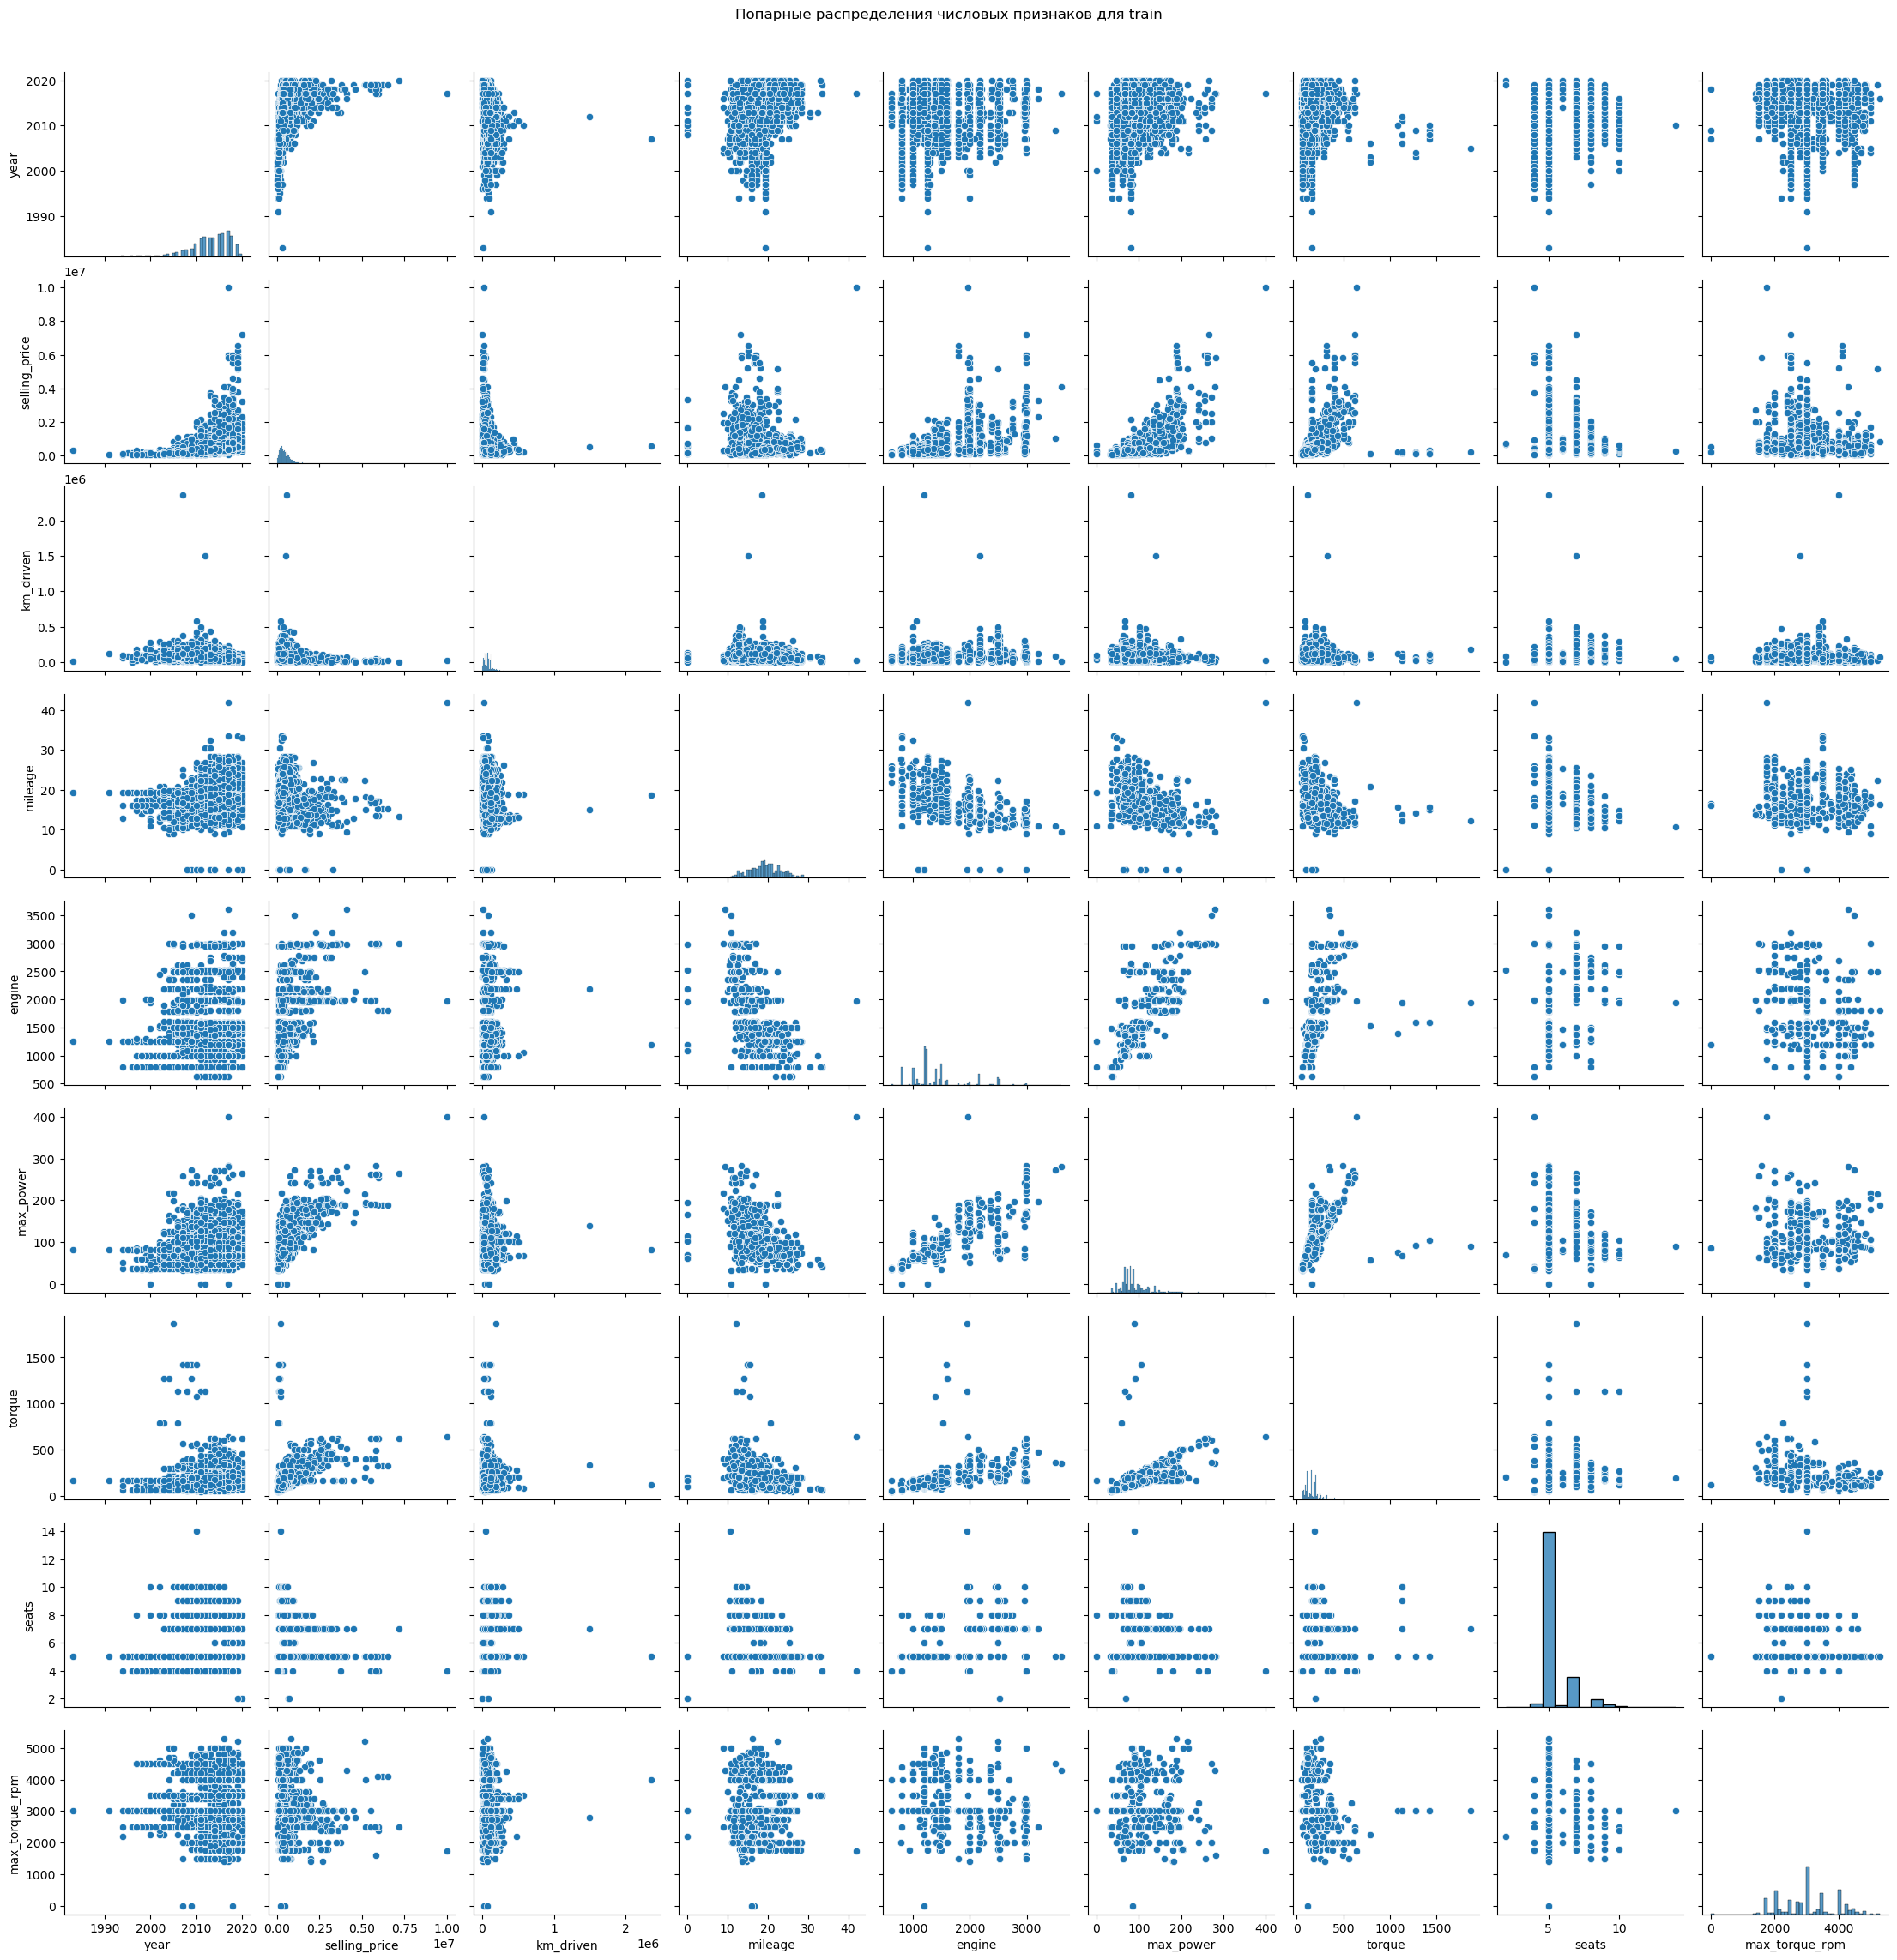

In [45]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns

pairplot = sns.pairplot(df_train[numeric_cols])
pairplot.fig.suptitle('Попарные распределения числовых признаков для train', y=1.02)
plt.show()

Да, можно предположить свзять целевой переменной с признаками: year (сильная), km_driven, engine, max_power

Да, на основе распределений можно выдвинуть гипотезу о корреляциях признаков. Например, (engine:max_powr), (engine:torque), (torque:max_powr)

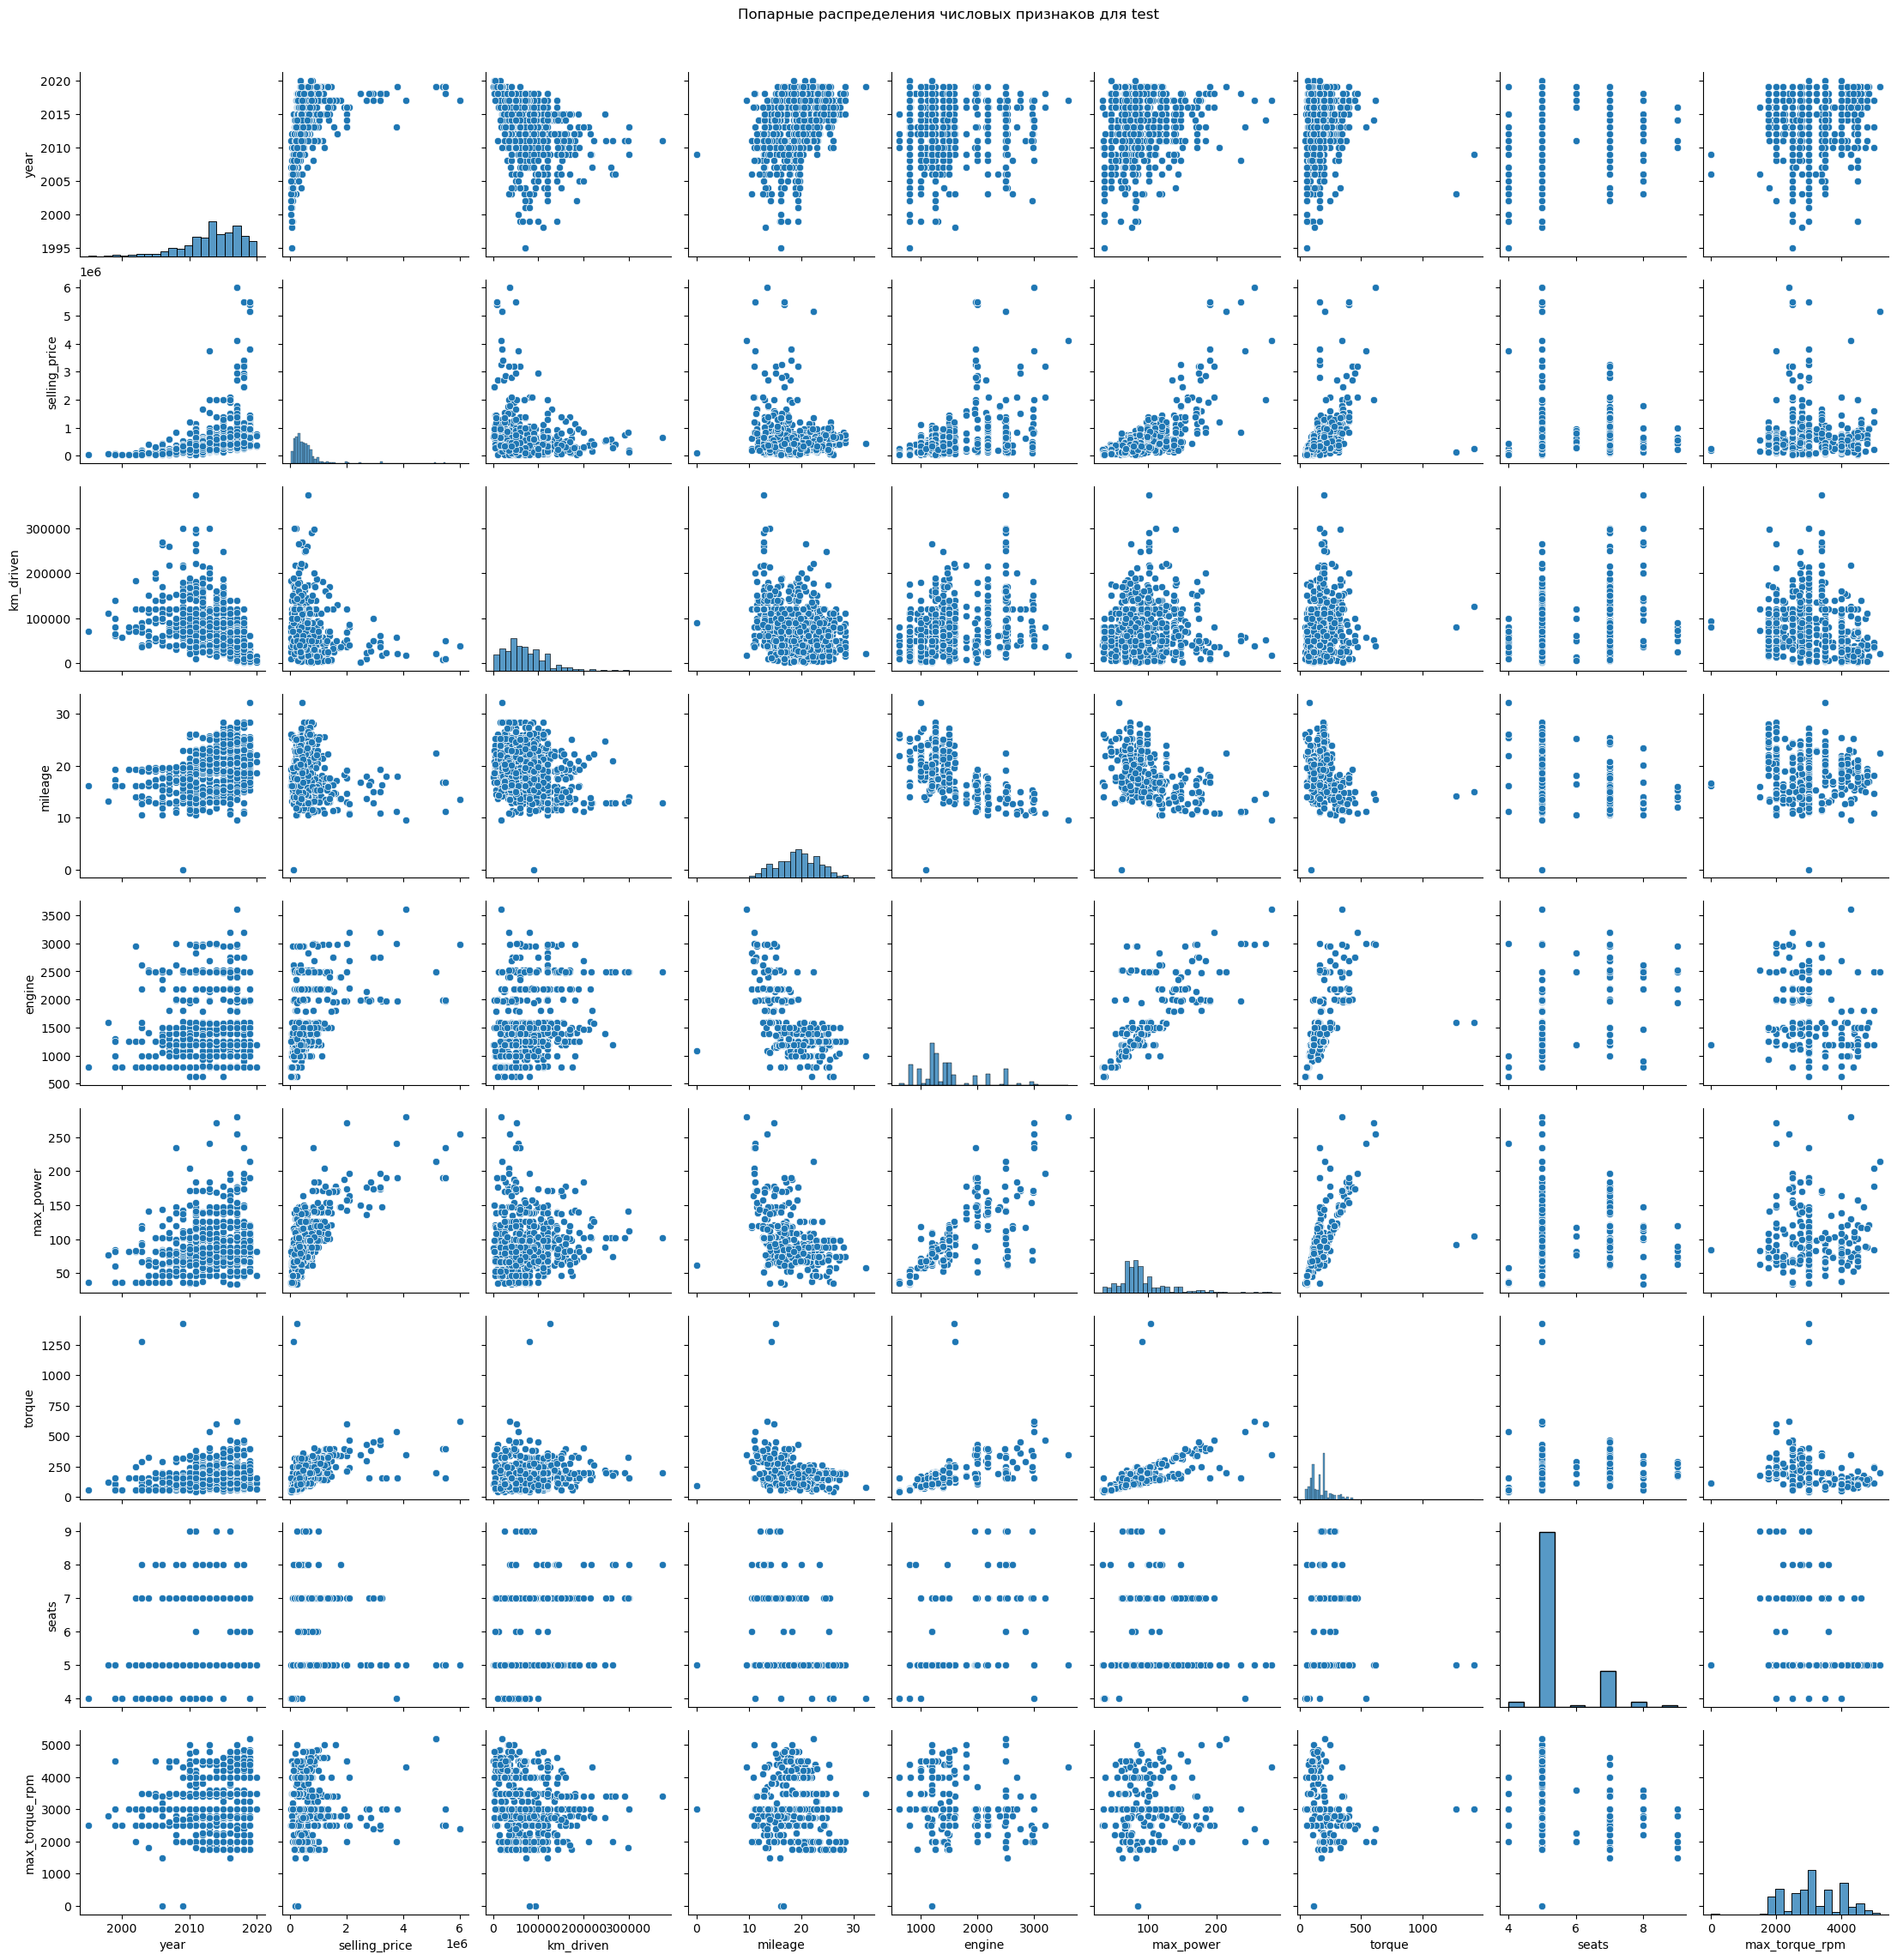

In [48]:
pairplot = sns.pairplot(df_test[numeric_cols])
pairplot.fig.suptitle('Попарные распределения числовых признаков для test', y=1.02)
plt.show()

В основном распредления похожи, но не все. Напрмиер, отличаются (km_driven, year), и вообще распределбения признака km_driven. Хотя есть подозрение, что они просто сжаты из-за огромного значения в train выборке (там что-то около 2млн км пробега)

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

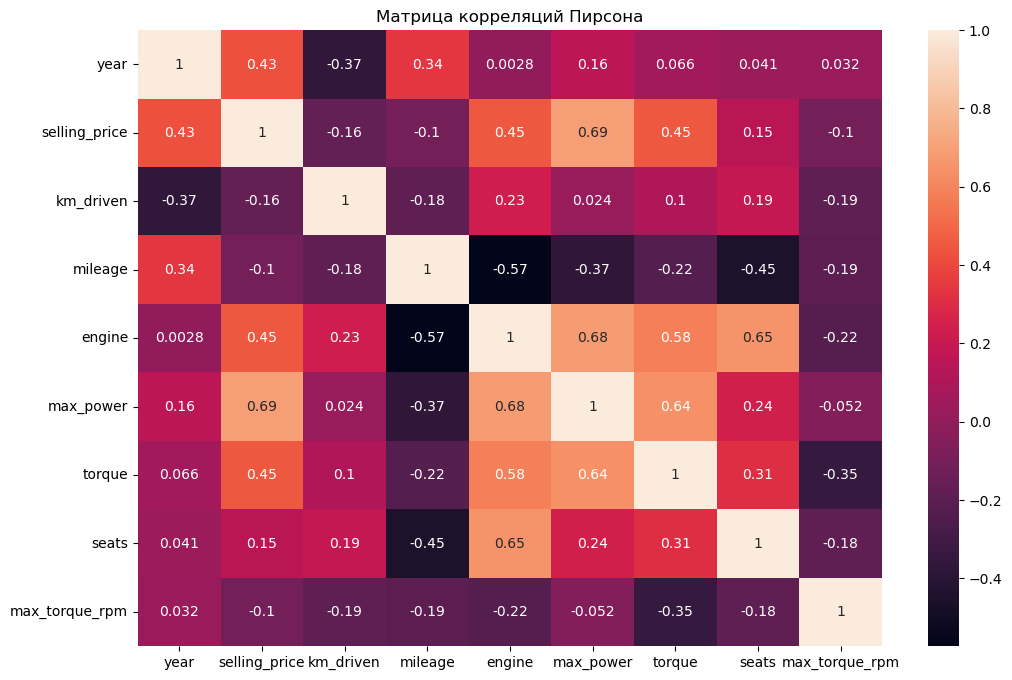

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(numeric_only=True), annot=True)
plt.title('Матрица корреляций Пирсона')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

`Your answer here`: 1) наименее скоррелированы между собой: engine и year. 2) Наблюдается довольно сильная положительная линейная зависимость: selling_price и max_power, engine и max_power, engine и seats, max_power и torque. 3) Утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи нельзя, так как между ними слабая корреляция. 4) По умолчанию используется корреляция Пирсона

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [55]:
def spearman_corr(x, y):
    rank_x = x.rank()
    rank_y = y.rank()
    return np.corrcoef(rank_x, rank_y)[0,1]

manual = pd.DataFrame(index=numeric_cols, columns=numeric_cols)
for col1 in numeric_cols:
    for col2 in numeric_cols:
        manual.loc[col1, col2] = spearman_corr(df_train[col1], df_train[col2])

manual = manual.astype(float)

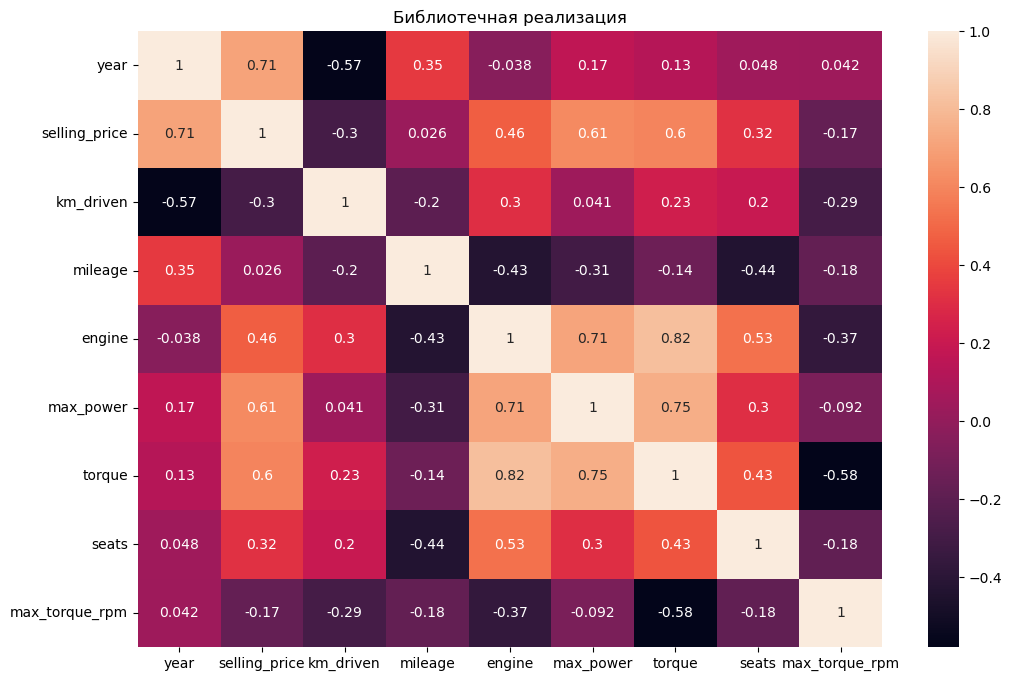

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(numeric_only=True, method='spearman'), annot=True)
plt.title('Библиотечная реализация')
plt.show()

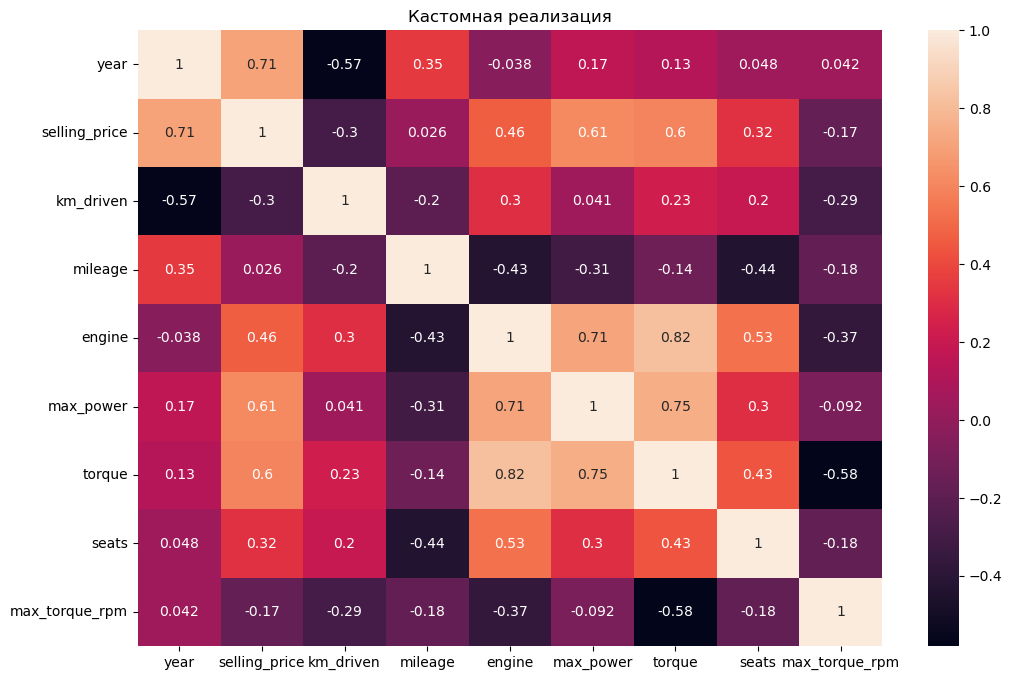

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(manual, annot=True)
plt.title('Кастомная реализация')
plt.show()

`Your answer here`: Ручная и библиотечная реализация показывают идентичный результат. Оказывается в ручную реализовать достаточно просто 

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


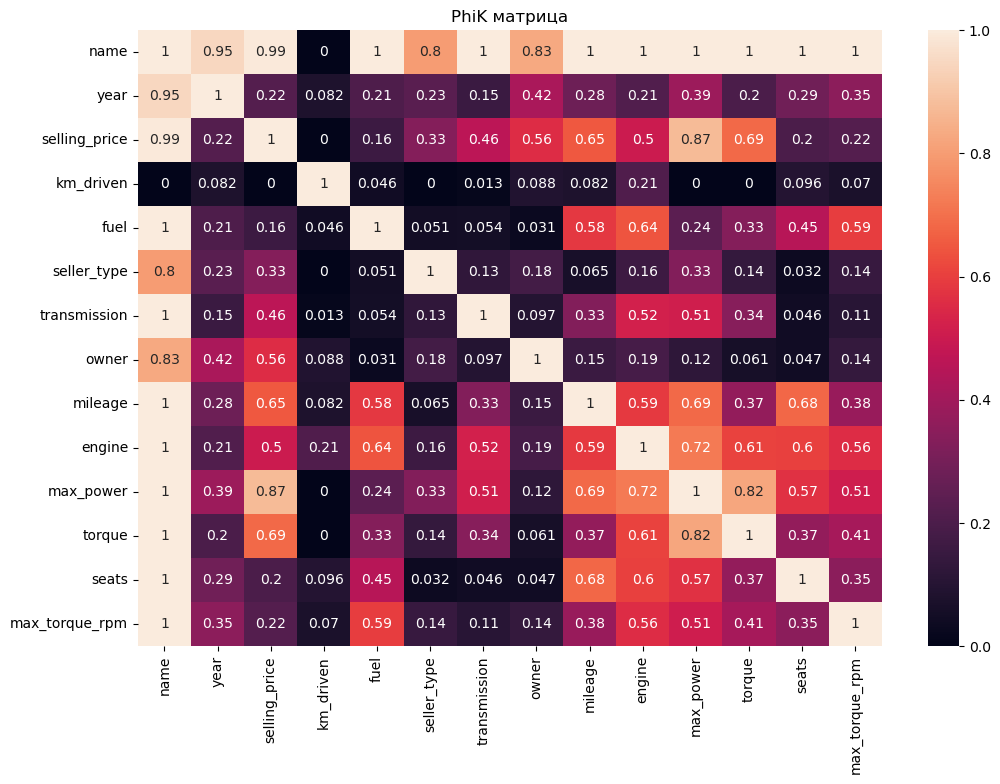

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.phik_matrix(), annot=True)
plt.title('PhiK матрица')
plt.show()

У признака name аномальные значения в матрице PhiK. У остальных категориальных признаков не выявилось сильных зависемостей с другими

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

Раз уж строили корреляцию, то можно построить и для оставшегося основного метода расчета, чтобы проанализировать на сколько тут будут отличаться значения корреляции и не пойвились ли какието новые пары сильно скоррелированных признаков

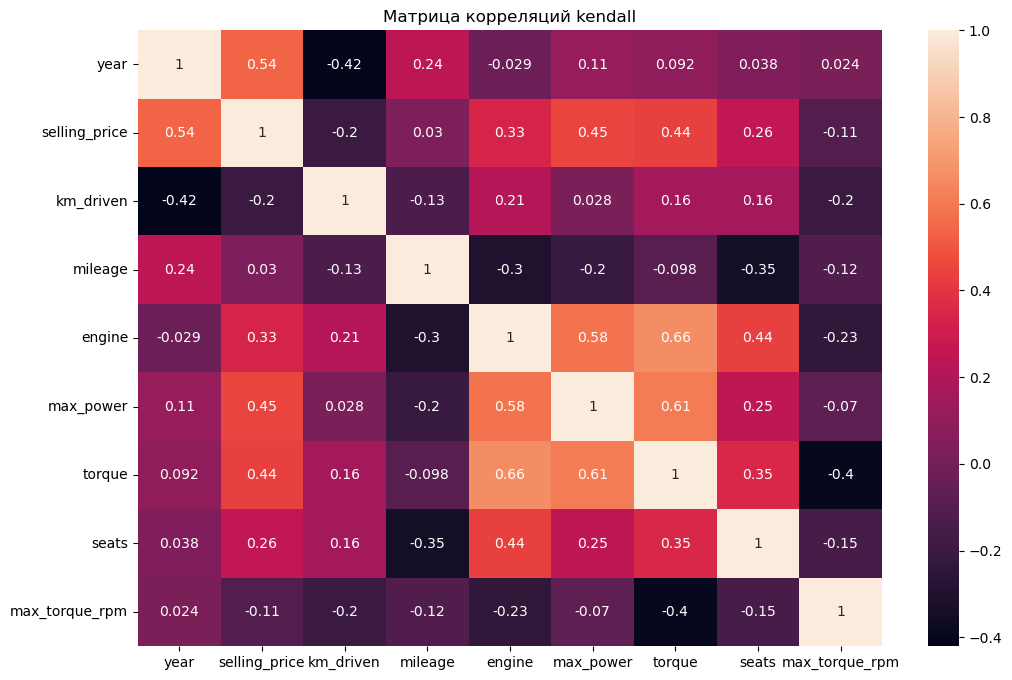

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(numeric_only=True, method='kendall'), annot=True)
plt.title('Матрица корреляций kendall')
plt.show()

Также можно простроить график зависимосте цены машины от года выпуска и типа топлива, чтобы более детально проанализировать эти зависимости. По нему видно, что новые машины стоят дороже, а среди них обычно выше в цене машины на бенизине

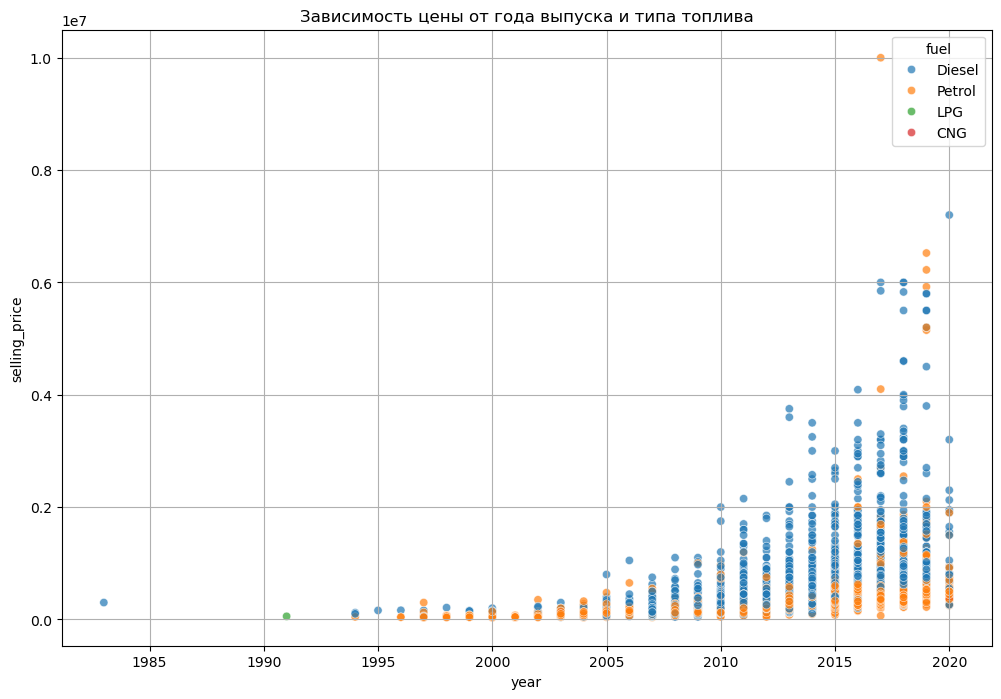

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_train, x='year', y='selling_price', hue='fuel', alpha=0.7)
plt.title('Зависимость цены от года выпуска и типа топлива')
plt.grid(True)
plt.show()

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [68]:
df_train_numeric = df_train.select_dtypes(['int', 'float'])
df_test_numeric = df_test.select_dtypes(['int', 'float'])
df_train_numeric.head(2)

year  selling_price  km_driven  mileage  engine  max_power  torque  seats  \
0  2014         450000     145500    23.40    1248      74.00   190.0      5   
1  2014         370000     120000    21.14    1498     103.52   250.0      5   

   max_torque_rpm  
0          2000.0  
1          2500.0

In [69]:
y_train = df_train_numeric.selling_price
X_train = df_train_numeric.drop(['selling_price'], axis=1)

In [70]:
assert X_train.shape == (5840, 8)

In [71]:
y_test = df_test_numeric.selling_price
X_test = df_test_numeric.drop(['selling_price'], axis=1)

In [72]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

print(f"MSE train: {np.round(MSE(y_train, train_pred))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred), 3)}")

MSE train: 115299845742.0
R2 train: 0.598

MSE test: 231311574671.0
R2 test: 0.598


R2 на трейне и тесте практически одинаковый и выглядит приемлемо, а вот MSE очень огроманая, ее тяжело тут интерпретировать, а значения на тесте хуже, чем на трейне

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [77]:
def r2_custom(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [78]:
print(f"R2 test, custom: {np.round(r2_custom(y_test, test_pred), 3)}")

R2 test, custom: 0.598


In [80]:
# Latex код для формулы написал DeepSeek

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

SS_res - сумма квадратов остатков (ошибка модели), где из истинного значения вычетается предсказанное </br>
SS_tot - общая сумма квадратов (дисперсия целевой переменной), где из истинного значния вычитается стреднее

`Your answer here` $R^2$ показывает долю дисперсии целевой переменной, объясненную моделью.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [85]:
def r2_custom_adjusted(y_true, y_pred, n_features):
    l = len(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return 1 - ((1 - r2) * (l - 1)) / (l - n_features - 1)

In [86]:
print(f"R2 test, custom: {np.round(r2_custom_adjusted(y_test, test_pred, 8), 3)}")

R2 test, custom: 0.594


`Your answer here` Эта метрика учитывает количество признаков в модели и используется, когда нужно сравнить модели с разным количеством признаков (так как она штрафует за добавление бесполезных признаков).

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = pd.DataFrame(
    data=scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index)

X_test_s = pd.DataFrame(
    data=scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index)

In [90]:
lin_reg_s = LinearRegression()
lin_reg_s.fit(X_train_s, y_train)
train_pred_s = lin_reg_s.predict(X_train_s)
test_pred_s = lin_reg_s.predict(X_test_s)

print(f"MSE train: {np.round(MSE(y_train, train_pred_s))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred_s), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred_s))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred_s), 3)}")

MSE train: 115299845742.0
R2 train: 0.598

MSE test: 231311574671.0
R2 test: 0.598


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [92]:
print(np.abs(lin_reg_s.coef_).max())
lin_reg_s.coef_

328556.77076851635


array([162302.86815966, -48364.36511944,  -1209.21772134,  35398.83772155,
       328556.77076852,  -3838.87141174, -28516.51097474, -50563.73055962])

In [93]:
print(f"Признак, наиболее информативным в предсказании цены: {
    X_test_s.columns[np.abs(lin_reg_s.coef_).argmax()]}")

Признак, наиболее информативным в предсказании цены: max_power


### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [95]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train_s, y_train)
train_pred_l = lasso_reg.predict(X_train_s)
test_pred_l = lasso_reg.predict(X_test_s)

print(f"MSE train: {np.round(MSE(y_train, train_pred_l))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred_l), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred_l))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred_l), 3)}")

MSE train: 115299845763.0
R2 train: 0.598

MSE test: 231312393195.0
R2 test: 0.598


**Качество практически не изменилось**

In [97]:
lasso_reg.coef_

array([162300.81406991, -48363.40586082,  -1206.14922155,  35395.95018283,
       328555.9908384 ,  -3835.04374133, -28512.76205099, -50560.55725495])

**Никакие коэффициенты не занулились** </br>
Видимо, все признаки информативны и имеют значение при предсказании

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_reg = Lasso()
gs_lasso = GridSearchCV(lasso_reg, param_grid_lasso, cv=10, scoring='r2')
gs_lasso.fit(X_train_s, y_train)
best_lasso = gs_lasso.best_estimator_

train_pred_bl = best_lasso.predict(X_train_s)
test_pred_bl = best_lasso.predict(X_test_s)

print(f"MSE train: {np.round(MSE(y_train, train_pred_bl))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred_bl), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred_bl))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred_bl), 3)}")

MSE train: 116094822570.0
R2 train: 0.595

MSE test: 238903207574.0
R2 test: 0.584


Пишлось обучить 9 * 10 = 90 моделей </br>
alpha - это коэффициент регуляризации

In [103]:
print("Лучший alpha:", gs_lasso.best_params_)

Лучший alpha: {'alpha': 10000}


In [104]:
best_lasso.coef_

array([153236.03721305, -37458.26305007,      0.        ,   1286.95748847,
       334654.51256008,      0.        ,     -0.        , -38711.65586439])

Да, веса занулились, но для этого пришлось добавить в сетку огромный alpha

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [107]:
from sklearn.linear_model import ElasticNet

param_grid_elastic = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 
                      'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elastic_net = ElasticNet()
gs_elastic = GridSearchCV(elastic_net, param_grid_elastic, cv=10, scoring='r2')
gs_elastic.fit(X_train_s, y_train)
best_elastic = gs_elastic.best_estimator_

train_pred_e = best_elastic.predict(X_train_s)
test_pred_e = best_elastic.predict(X_test_s)

print(f"MSE train: {np.round(MSE(y_train, train_pred_e))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred_e), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred_e))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred_e), 3)}")

MSE train: 116834913337.0
R2 train: 0.592

MSE test: 244934121643.0
R2 test: 0.574


Пишлось обучить 9 * 5 * 10 = 450 моделей </br>
l1_ratio - это соотношение L1/L2

In [109]:
print("Лучшие гиперпараметры:", gs_elastic.best_params_)

Лучшие гиперпараметры: {'alpha': 1, 'l1_ratio': 0.9}


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [111]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_s, y_train)
train_pred_r = ridge_reg.predict(X_train_s)
test_pred_r = ridge_reg.predict(X_test_s)

print(f"MSE train: {np.round(MSE(y_train, train_pred_r))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred_r), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred_r))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred_r), 3)}")

MSE train: 115299853949.0
R2 train: 0.598

MSE test: 231335920253.0
R2 test: 0.598


In [112]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_s, y_train)
    pred = ridge.predict(X_test_s)
    print(f"alpha: {alpha}")
    print(f"MSE test: {np.round(MSE(y_test, pred))}")
    print(f"R2 test: {np.round(r2_score(y_test, pred), 3)}")
    print()

alpha: 0.001
MSE test: 231311599018.0
R2 test: 0.598

alpha: 0.01
MSE test: 231311818132.0
R2 test: 0.598

alpha: 0.1
MSE test: 231314009269.0
R2 test: 0.598

alpha: 1
MSE test: 231335920253.0
R2 test: 0.598

alpha: 10
MSE test: 231554986199.0
R2 test: 0.597

alpha: 100
MSE test: 233737300034.0
R2 test: 0.593

alpha: 1000
MSE test: 253760457276.0
R2 test: 0.559



С учеличением коэффициенита регуляризации качество ухудшается. А в целом, качество относительно базового алгоритма улучшить не удалось

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [119]:
df_train.name

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2               Hyundai i20 Sportz Diesel
3                  Maruti Swift VXI BSIII
4           Hyundai Xcent 1.2 VTVT E Plus
                      ...                
5835              Hyundai Santro Xing GLS
5836    Maruti Wagon R VXI BS IV with ABS
5837                    Hyundai i20 Magna
5838                Hyundai Verna CRDi SX
5839               Maruti Swift Dzire ZDi
Name: name, Length: 5840, dtype: object

In [120]:
df_train.name.value_counts()

name
Maruti Swift Dzire VDI                          91
Maruti Alto 800 LXI                             58
Maruti Alto LXi                                 56
Maruti Swift VDI                                48
Maruti Swift VDI BSIV                           47
                                                ..
Honda Amaze S AT i-Vtech                         1
Honda Jazz 1.2 SV i VTEC                         1
Maruti Baleno Zeta                               1
Honda Civic 1.8 (E) MT                           1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV     1
Name: count, Length: 1924, dtype: int64

Есть мысль взять только марку, чтобы уменьшить будущее количество классов

In [122]:
df_train.name.str.split().str[0].value_counts()

name
Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: count, dtype: int64

Все равно много марок, есть идея объединить их по странам

In [124]:
# Словарь для отнесения к стране написал DeepSeak, так как я не знаток в марках
brand_country = {
    'Maruti': 'Japan', 'Hyundai': 'Korea', 'Toyota': 'Japan', 'Honda': 'Japan',
    'Nissan': 'Japan', 'Mitsubishi': 'Japan', 'Lexus': 'Japan', 'Datsun': 'Japan',
    'Tata': 'India', 'Mahindra': 'India', 'Force': 'India', 'Ambassador': 'India', 'Ashok': 'India',
    'Ford': 'USA', 'Chevrolet': 'USA', 'Jeep': 'USA',
    'Volkswagen': 'Germany', 'Mercedes-Benz': 'Germany', 'BMW': 'Germany', 'Audi': 'Germany', 'Opel': 'Germany',
    'Skoda': 'Czech', 'Renault': 'France', 'Peugeot': 'France',
    'Volvo': 'Sweden', 'Fiat': 'Italy', 'Isuzu': 'Japan', 'Land': 'UK',
    'MG': 'UK', 'Daewoo': 'Korea', 'Kia': 'Korea', 'Jaguar': 'UK'
}

In [125]:
X_train_cat = X_train_s.copy()
X_train_cat['country'] = df_train.name.str.split().str[0].map(brand_country)
X_train_cat[['fuel', 'seller_type', 'transmission', 'owner']] = \
    df_train[['fuel', 'seller_type', 'transmission', 'owner']]
X_train_cat.head(2)

year  km_driven   mileage    engine  max_power    torque     seats  \
0  0.13957   1.191152  0.995867 -0.373643  -0.438819  0.156731 -0.434419   
1  0.13957   0.766619  0.428830  0.141162   0.493632  0.724961 -0.434419   

   max_torque_rpm country    fuel seller_type transmission         owner  
0       -1.257179   Japan  Diesel  Individual       Manual   First Owner  
1       -0.653325   Czech  Diesel  Individual       Manual  Second Owner

In [126]:
X_test_cat = X_test_s.copy()
X_test_cat['country'] = df_test.name.str.split().str[0].map(brand_country)
X_test_cat[['fuel', 'seller_type', 'transmission', 'owner']] = \
    df_test[['fuel', 'seller_type', 'transmission', 'owner']]
X_test_cat.head(2)

year  km_driven   mileage    engine  max_power    torque     seats  \
0 -0.837167   1.565740 -1.362605  2.200379   0.761490 -0.127384  1.601702   
1  0.872122  -0.814974  0.519155  0.139102   0.650935  0.819666 -0.434419   

   max_torque_rpm country    fuel seller_type transmission        owner  
0       -0.049471   India  Diesel  Individual       Manual  First Owner  
1       -0.351398   India  Diesel  Individual       Manual  First Owner

In [127]:
assert X_train_cat.shape == (5840, 13)

In [128]:
X_train_cat.describe(include='object')

country    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      10       4           3            2            5
top      Japan  Diesel  Individual       Manual  First Owner
freq      2546    3177        5223         5336         3603

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [130]:
X_train_cat['seats'] = df_train['seats']
X_test_cat['seats'] = df_test['seats']

In [131]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'country', 'seats']
X_train_enc = pd.DataFrame(encoder.fit_transform(X_train_cat[cat_cols]), 
                          columns=encoder.get_feature_names_out(cat_cols))
X_test_enc = pd.DataFrame(encoder.transform(X_test_cat[cat_cols]),
                         columns=encoder.get_feature_names_out(cat_cols))

In [132]:
X_train_enc.head(2)

fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          1.0       0.0          0.0                     1.0   
1          1.0       0.0          0.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                           0.0                  1.0   
1                           0.0                  1.0   

   owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                         0.0                 0.0                   0.0   
1                         0.0                 1.0                   0.0   

   owner_Third Owner  ...  country_UK  country_USA  seats_4  seats_5  seats_6  \
0                0.0  ...         0.0          0.0      0.0      1.0      0.0   
1                0.0  ...         0.0          0.0      0.0      1.0      0.0   

   seats_7  seats_8  seats_9  seats_10  seats_14  
0      0.0      0.0      0.0       0.0       0.0  
1      0.0      0.0      0.0       0.0       0.0  

[2 rows x 27 columns]

In [133]:
X_train_final = pd.concat([X_train_cat.drop(cat_cols, axis=1), X_train_enc], axis=1)
X_test_final = pd.concat([X_test_cat.drop(cat_cols, axis=1), X_test_enc], axis=1)

In [134]:
X_train_final.head(2)

year  km_driven   mileage    engine  max_power    torque  \
0  0.13957   1.191152  0.995867 -0.373643  -0.438819  0.156731   
1  0.13957   0.766619  0.428830  0.141162   0.493632  0.724961   

   max_torque_rpm  fuel_Diesel  fuel_LPG  fuel_Petrol  ...  country_UK  \
0       -1.257179          1.0       0.0          0.0  ...         0.0   
1       -0.653325          1.0       0.0          0.0  ...         0.0   

   country_USA  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
0          0.0      0.0      1.0      0.0      0.0      0.0      0.0   
1          0.0      0.0      1.0      0.0      0.0      0.0      0.0   

   seats_10  seats_14  
0       0.0       0.0  
1       0.0       0.0  

[2 rows x 34 columns]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here` 1) Нужено обучать OHE только на train, а применять уже на train и test, также использовать handle_unknown='ignore' для тестовых данных. 2) Чтобы избежать мультиколлинеарности (dummy ловушка) 3) Нет, так как OHE создает как бы целостное представление категории и нельзя его искажать.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
ridge = Ridge()
gs_ridge = GridSearchCV(ridge, param_grid_ridge, cv=10, scoring='r2')
gs_ridge.fit(X_train_final, y_train)

best_ridge = gs_ridge.best_estimator_
train_pred_ridge = best_ridge.predict(X_train_final)
test_pred_ridge = best_ridge.predict(X_test_final)

print(f"MSE train: {np.round(MSE(y_train, train_pred_ridge))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred_ridge), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred_ridge))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred_ridge), 3)}")

MSE train: 84005256156.0
R2 train: 0.707

MSE test: 182817388556.0
R2 test: 0.682


Да, качество прогнозов неплохо улучшилось

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Интересно посмотреть на важность признаков

In [143]:
feature_importance = pd.DataFrame({
    'feature': X_train_final.columns,
    'coefficient': best_ridge.coef_
}).sort_values('coefficient', key=abs, ascending=False)
feature_importance

feature   coefficient
15          owner_Test Drive Car  2.618858e+06
23                country_Sweden  1.769717e+06
24                    country_UK  8.012922e+05
26                       seats_4  4.224508e+05
18               country_Germany  3.351734e+05
4                      max_power  2.428580e+05
12           transmission_Manual -2.068419e+05
0                           year  1.561029e+05
8                       fuel_LPG  1.534598e+05
21                 country_Japan  1.106182e+05
27                       seats_5 -9.389895e+04
33                      seats_14 -9.063520e+04
28                       seats_6 -8.790562e+04
11  seller_type_Trustmark Dealer -8.199162e+04
10        seller_type_Individual -8.192335e+04
3                         engine  5.970549e+04
13    owner_Fourth & Above Owner -5.880073e+04
22                 country_Korea  5.877843e+04
14            owner_Second Owner -5.874990e+04
32                      seats_10 -5.335622e+04
19                 country_India -5.304469e+04
16             owner_Third Owner -5.005571e+04
29                       seats_7 -4.242778e+04
30                       seats_8 -4.155615e+04
31                       seats_9 -3.889806e+04
7                    fuel_Diesel  3.664340e+04
17                country_France  3.343107e+04
1                      km_driven -3.094879e+04
20                 country_Italy -2.890624e+04
6                 max_torque_rpm -2.734521e+04
2                        mileage  1.456715e+04
25                   country_USA  1.226391e+04
5                         torque  6.181075e+03
9                    fuel_Petrol  2.974717e+03

Попробую сделать преобразования для самых важных не категориальных признаков

In [145]:
X_train_final_2 = X_train_final.copy()
X_test_final_2 = X_test_final.copy()

X_train_final_2['year_exp'] = np.exp(df_train['year'] / 10)
X_test_final_2['year_exp'] = np.exp(df_test['year'] / 10)

X_train_final_2['max_2_owners'] = (df_train['owner'].isin(['First Owner', 'Second Owner'])).astype(int)
X_test_final_2['max_2_owners'] = (df_test['owner'].isin(['First Owner', 'Second Owner'])).astype(int)

X_train_final_2['power_per_liter'] = df_train['max_power'] / df_train['engine']
X_test_final_2['power_per_liter'] = df_test['max_power'] / df_test['engine']

X_train_final_2['year_squared'] = df_train['year'] ** 2
X_test_final_2['year_squared'] = df_test['year'] ** 2

In [146]:
X_train_final_2.head(2)

year  km_driven   mileage    engine  max_power    torque  \
0  0.13957   1.191152  0.995867 -0.373643  -0.438819  0.156731   
1  0.13957   0.766619  0.428830  0.141162   0.493632  0.724961   

   max_torque_rpm  fuel_Diesel  fuel_LPG  fuel_Petrol  ...  seats_6  seats_7  \
0       -1.257179          1.0       0.0          0.0  ...      0.0      0.0   
1       -0.653325          1.0       0.0          0.0  ...      0.0      0.0   

   seats_8  seats_9  seats_10  seats_14      year_exp  max_2_owners  \
0      0.0      0.0       0.0       0.0  2.930277e+87             1   
1      0.0      0.0       0.0       0.0  2.930277e+87             1   

   power_per_liter  year_squared  
0         0.059295       4056196  
1         0.069105       4056196  

[2 rows x 38 columns]

In [147]:
new_features = ['year_exp', 'power_per_liter', 'year_squared']
scaler_new = StandardScaler()

X_train_final_2[new_features] = scaler_new.fit_transform(X_train_final_2[new_features])
X_test_final_2[new_features] = scaler_new.transform(X_test_final_2[new_features])

In [148]:
X_train_final_2.head(2)

year  km_driven   mileage    engine  max_power    torque  \
0  0.13957   1.191152  0.995867 -0.373643  -0.438819  0.156731   
1  0.13957   0.766619  0.428830  0.141162   0.493632  0.724961   

   max_torque_rpm  fuel_Diesel  fuel_LPG  fuel_Petrol  ...  seats_6  seats_7  \
0       -1.257179          1.0       0.0          0.0  ...      0.0      0.0   
1       -0.653325          1.0       0.0          0.0  ...      0.0      0.0   

   seats_8  seats_9  seats_10  seats_14  year_exp  max_2_owners  \
0      0.0      0.0       0.0       0.0 -0.046964             1   
1      0.0      0.0       0.0       0.0 -0.046964             1   

   power_per_liter  year_squared  
0        -0.271400      0.138716  
1         0.525374      0.138716  

[2 rows x 38 columns]

In [149]:
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
ridge = Ridge()
gs_ridge = GridSearchCV(ridge, param_grid_ridge, cv=10, scoring='r2')
gs_ridge.fit(X_train_final_2, y_train)

best_ridge_2 = gs_ridge.best_estimator_
train_pred_ridge_2 = best_ridge_2.predict(X_train_final_2)
test_pred_ridge_2 = best_ridge_2.predict(X_test_final_2)

print(f"MSE train: {np.round(MSE(y_train, train_pred_ridge_2))}")
print(f"R2 train: {np.round(r2_score(y_train, train_pred_ridge_2), 3)}")
print()
print(f"MSE test: {np.round(MSE(y_test, test_pred_ridge_2))}")
print(f"R2 test: {np.round(r2_score(y_test, test_pred_ridge_2), 3)}")

MSE train: 77981325602.0
R2 train: 0.728

MSE test: 171507447733.0
R2 test: 0.702


Удалось еще улучшить качество!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [167]:
def business_metrics(y_true, y_pred):
    error = np.abs((y_pred - y_true) / y_true)
    percent_error = error <= 0.10
    score = np.mean(percent_error)
    print(f"{score*100:.1f}% попаданий")
    return score

In [168]:
print("В регресси на не отнормированных признаках")
_=business_metrics(y_test, test_pred)

В регресси на не отнормированных признаках
23.5% попаданий


In [169]:
print("В регресси на отнормированных признаках")
_=business_metrics(y_test, test_pred_s)

В регресси на отнормированных признаках
23.5% попаданий


In [170]:
print("В lasso модели без категориальных признаков, с GS")
_=business_metrics(y_test, test_pred_bl)

В lasso модели без категориальных признаков, с GS
23.1% попаданий


In [171]:
print("В ElasticNet модели без категориальных признаков")
_=business_metrics(y_test, test_pred_e)

В ElasticNet модели без категориальных признаков
24.2% попаданий


In [172]:
print("В Ridge модели без категориальных признаков")
_=business_metrics(y_test, test_pred_r)

В Ridge модели без категориальных признаков
23.5% попаданий


In [173]:
print("В предфинальной модели")
_=business_metrics(y_test, test_pred_ridge)

В предфинальной модели
26.8% попаданий


In [174]:
print("В финальной модели")
_=business_metrics(y_test, test_pred_ridge_2)

В финальной модели
23.4% попаданий


Оказывается не всегда лучшая по офлайн метрикам модель будет лучшей по бизнес метрике

Лучшее качество по бизнес метрике оказалось у модели Ridge с подбором гиперпараметров и всеми признаками, использованными по заданию

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [178]:
def asymmetric_accuracy(y_true, y_pred):
    lower_bound = y_true * (0.8)
    upper_bound = y_true * (1.35)
    range = (y_pred >= lower_bound) & (y_pred <= upper_bound)
    score = np.mean(range)
    print(f"{score*100:.1f}% попаданий")
    return score

In [179]:
print("В регресси на не отнормированных признаках")
_=asymmetric_accuracy(y_test, test_pred)

В регресси на не отнормированных признаках
52.0% попаданий


In [180]:
print("В регресси на отнормированных признаках")
_=asymmetric_accuracy(y_test, test_pred_s)

В регресси на отнормированных признаках
52.0% попаданий


In [181]:
print("В lasso модели без категориальных признаков, с GS")
_=asymmetric_accuracy(y_test, test_pred_bl)

В lasso модели без категориальных признаков, с GS
52.9% попаданий


In [182]:
print("В ElasticNet модели без категориальных признаков")
_=asymmetric_accuracy(y_test, test_pred_e)

В ElasticNet модели без категориальных признаков
52.8% попаданий


In [183]:
print("В Ridge модели без категориальных признаков")
_=asymmetric_accuracy(y_test, test_pred_r)

В Ridge модели без категориальных признаков
52.0% попаданий


In [184]:
print("В предфинальной модели")
_=asymmetric_accuracy(y_test, test_pred_ridge)

В предфинальной модели
54.2% попаданий


In [185]:
print("В финальной модели")
_=asymmetric_accuracy(y_test, test_pred_ridge_2)

В финальной модели
50.9% попаданий


Правая граница выбрана больше, так как недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.

Лучшее качество по кастомной метрике также оказалось у модели Ridge с подбором гиперпараметров и всеми признаками, использованными по заданию

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

Сохранение лучшей модели и процесса предобработки

In [191]:
import pickle
import json

preprocessing_pipeline = {
    'scaler': scaler, 
    'encoder': encoder,  
    'country_mapping': brand_country, 
    'median_values': median_values.to_dict(),  
    'feature_order': X_train_final.columns.tolist()  
}

with open('preprocessing.pkl', 'wb') as f:
    pickle.dump(preprocessing_pipeline, f)

with open('best_ridge_model.pkl', 'wb') as f:
    pickle.dump(best_ridge, f)

In [264]:
scaler.feature_names_in_

array(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'], dtype=object)

In [262]:
encoder.feature_names_in_

array(['fuel', 'seller_type', 'transmission', 'owner', 'country', 'seats'],
      dtype=object)

In [149]:
df_test.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [151]:
df_test.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

In [270]:
df_test.seller_type.value_counts()

seller_type
Individual          837
Dealer              135
Trustmark Dealer     28
Name: count, dtype: int64

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
